####Tarea de aprendizaje 4. Graficación con matplotlib en Phyton

Instrucciones: El ejercicio consiste en graficar la longitud media de 10 especies de ranas con puntos que varién por color según su coloración dominante de la especie y el tamaño del punto varié según el peso promedio de la especie.

In [38]:
import os #Accedemos al sistema operativo
import pandas as pd #Cargamos la biblioteca "pandas"
import matplotlib.pyplot as plt #Cargamos la biblioteca "matplotlib"

In [39]:
os.chdir("C:/Users/OPT9030-GBB/Documents/Versiones/Ecoacustics_MX/Tareas aprendizaje/004 Gráficas con ggplot2 y Matplotlib") #Selecciono el directorio de trabajo
archivos = os.listdir() #Indicamos que guarde en la lista "archivos" el contenido de dicha carpeta
archivos #Solicitamos que despliegue su contenido

['.ipynb_checkpoints',
 '.Rhistory',
 'algo.txt',
 'Datos_PTC_10spp_Ranas.csv',
 'Ejemplo lectura CSV.ipynb',
 'TA4_grafico_ggplot.docx',
 'TA4_grafico_ggplot.nb.html',
 'TA4_grafico_ggplot.Rmd',
 'TA4_grafico_matplotlib.ipynb']

In [40]:
ranas = pd.read_csv(archivos[3], encoding = 'latin1') #Leemos el archivo csv e indico el sistema de codificación adecuado para interpretar el archivo
ranas # Desplegamos el archivo de datos

,No.,Familia,Especie,No_individuos,Longitud_media_cm,Peso_promedio_gr,Color_dominante
0,1,Hylidae,C. taeniopus,8,9.494,48.94,Verde oscuro
1,2,Craugastoridae,C. decoratus,1,2.500,30.00,Café
2,3,Craugastoridae,C. rhodopis,97,1.836,23.84,Café oscuro
3,4,Craugastoridae,C. pygmaeus,3,0.300,13.88,Café medio
4,5,Hylidae,E. miotympanum,104,1.330,26.68,Verde claro
5,6,Eleutherodactylidae,E. cystignathoides,10,0.660,19.25,Gris
6,7,Centrolenidae,H. fleischmanni,8,0.731,23.83,Verde limón
7,8,Bufonidae,I. valliceps,1,13.500,50.20,Café claro
8,9,Ranidae,L. berlandieri,1,3.500,32.00,Verde
9,10,Hylidae,P. arborescandens,27,2.767,32.44,Dorado


In [41]:
type(ranas) #Solicitamos nos indique ¿de qué tipo es el objeto "ranas"?

pandas.core.frame.DataFrame

In [42]:
ranas.columns #¿Qué campos contiene el dataframe "ranas"?

Index(['No.', 'Familia', 'Especie', 'No_individuos', 'Longitud_media_cm',
       'Peso_promedio_gr', 'Color_dominante'],
      dtype='object')

In [43]:
ranas.dtypes #¿De qué tipo son las variables del objeto "ranas"?

No.                    int64
Familia               object
Especie               object
No_individuos          int64
Longitud_media_cm    float64
Peso_promedio_gr     float64
Color_dominante       object
dtype: object

In [44]:
#Convertimos las variables de tipo objeto "Familia", "Especie" y "Color_dominante" a variables de tipo categoría
ranas["Familia"] = ranas["Familia"].astype("category")
ranas["Especie"] = ranas["Especie"].astype("category")
ranas["Color_dominante"] = ranas["Color_dominante"].astype("category")
ranas.dtypes #Mostrar los tipos de variables con los cambios realizados

No.                     int64
Familia              category
Especie              category
No_individuos           int64
Longitud_media_cm     float64
Peso_promedio_gr      float64
Color_dominante      category
dtype: object

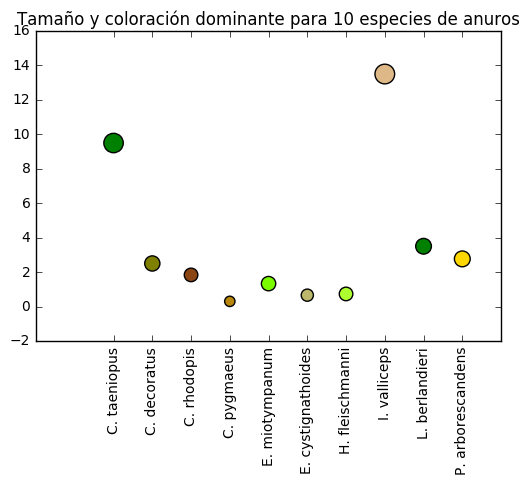

In [45]:
fig, ax = plt.subplots() #Creamos una figura que contenga los ejes (aun no se les asignan variables ni datos)

# Indicamos equivalencias de color entre el indicado en la serie de datos y el color que se usará en la graficación.
mapa_de_colores = {'Verde oscuro':'green', 'Café ':'olive', 
                    'Café oscuro':'saddlebrown', 'Café medio':'darkgoldenrod', 
                    'Verde claro':'lawngreen', 'Gris':'darkkhaki', 
                    'Verde limón':'greenyellow', 'Café claro':'burlywood',
                    'Verde':'g','Dorado':'gold'}

#Creamos un gráfico de tipo "scatter" indicando cuáles son los parámetros: eje x, eje y, color y tamaño del marcador. 
ax.scatter(range(len(ranas.Especie.values)), ranas.Longitud_media_cm, 
           c=ranas.Color_dominante.apply(lambda x: mapa_de_colores[x]), s=ranas.Peso_promedio_gr * 4)

#Indicamos que los nombres de las especies en el eje X, con el texto girado en un ángulo de 90° (vertical)
plt.xticks(range(len(ranas.Especie.values)), ranas.Especie, rotation=90)

#Le colocamos título al gráfico 
ax.set_title('Tamaño y coloración dominante para 10 especies de anuros')

#Solicitamos que muestre el gráfico creado
plt.show()